<a href="https://colab.research.google.com/github/khairiyah98/python_eda/blob/main/Qn3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Set working directory
#@title Set up Directory { run: "auto"}
import os
from google.colab import drive 
drive.mount('/content/gdrive')
working_directory = 'My Drive/MND' #@param {type:"string"}
wd="/content/gdrive/"+working_directory
os.chdir(wd)

dirpath = os.getcwd()
print("current directory is : " + dirpath)

Mounted at /content/gdrive
current directory is : /content/gdrive/My Drive/MND


In [ ]:
import pandas as pd
import xlrd

df = pd.read_excel('data/Povertydata_train.xlsm')

In [ ]:
df.shape

(29081, 61)

In [ ]:
df.head(3)

,Region,Electricity,Total_Household_Income,Total_Food_Expenditure,Main_Source_of_Income,Agricultural_Household_indicator,Bread_and_Cereals_Expenditure,Total_Rice_Expenditure,Meat_Expenditure,Total_Fish_and__marine_products,Fruit_Expenditure,Vegetables_Expenditure,Restaurant_and_hotels_Expenditur,Alcoholic_Beverages_Expenditure,Tobacco_Expenditure,Clothing__Footwear_and_Other_We,Housing_and_water_Expenditure,Imputed_House_Rental_Value,Medical_Care_Expenditure,Transportation_Expenditure,Communication_Expenditure,Education_Expenditure,Miscellaneous_Goods_and_Services,Special_Occasions_Expenditure,Crop_Farming_and_Gardening_expen,Total_Income_from_Entrepreneuria,Household_Head_Sex,Household_Head_Age,Household_Head_Marital_Status,Household_Head_Highest_Grade_Com,Household_Head_Job_or_Business_I,Household_Head_Occupation,Household_Head_Class_of_Worker,Type_of_Household,Total_Number_of_Family_members,Members_with_age_less_than_5_yea,Members_with_age_5___17_years_ol,Total_number_of_family_members_e,Type_of_Building_House,Type_of_Roof,Type_of_Walls,House_Floor_Area,House_Age,Number_of_bedrooms,Tenure_Status,Toilet_Facilities,Main_Source_of_Water_Supply,Number_of_Television,Number_of_CD_VCD_DVD,Number_of_Component_Stereo_set,Number_of_Refrigerator_Freezer,Number_of_Washing_Machine,Number_of_Airconditioner,Number_of_Car__Jeep__Van,Number_of_Landline_wireless_tele,Number_of_Cellular_phone,Number_of_Personal_Computer,Number_of_Stove_with_Oven_Gas_Ra,Number_of_Motorized_Banca,Number_of_Motorcycle_Tricycle,Poverty_Flag
0,CAR,1,480332,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,Extended Family,4,0,1,1,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,80,75,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...","Own use, faucet, community water system",1,1,0,1,1,0,0,0,2,1,0,0,1,0
1,CAR,0,82785,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,Single Family,6,0,4,3,Single house,"Light material (cogon,nipa,anahaw)",Light,35,12,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...","Shared, faucet, community water system",0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CAR,1,107589,78189,Wage/Salaries,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,Single Family,3,0,3,2,Single house,"Light material (cogon,nipa,anahaw)",Light,30,15,1,Own or owner-like possession of house and lot,Closed pit,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
df.Poverty_Flag.value_counts() #highly imbalanced data, most of observations fall under Poverty_Flag = 0

0    25800
1     3281
Name: Poverty_Flag, dtype: int64

In [ ]:
null_data = df[df.isnull().any(axis=1)]

In [ ]:
null_data.shape

(5236, 61)

In [ ]:
null_data.head()

,Region,Electricity,Total_Household_Income,Total_Food_Expenditure,Main_Source_of_Income,Agricultural_Household_indicator,Bread_and_Cereals_Expenditure,Total_Rice_Expenditure,Meat_Expenditure,Total_Fish_and__marine_products,Fruit_Expenditure,Vegetables_Expenditure,Restaurant_and_hotels_Expenditur,Alcoholic_Beverages_Expenditure,Tobacco_Expenditure,Clothing__Footwear_and_Other_We,Housing_and_water_Expenditure,Imputed_House_Rental_Value,Medical_Care_Expenditure,Transportation_Expenditure,Communication_Expenditure,Education_Expenditure,Miscellaneous_Goods_and_Services,Special_Occasions_Expenditure,Crop_Farming_and_Gardening_expen,Total_Income_from_Entrepreneuria,Household_Head_Sex,Household_Head_Age,Household_Head_Marital_Status,Household_Head_Highest_Grade_Com,Household_Head_Job_or_Business_I,Household_Head_Occupation,Household_Head_Class_of_Worker,Type_of_Household,Total_Number_of_Family_members,Members_with_age_less_than_5_yea,Members_with_age_5___17_years_ol,Total_number_of_family_members_e,Type_of_Building_House,Type_of_Roof,Type_of_Walls,House_Floor_Area,House_Age,Number_of_bedrooms,Tenure_Status,Toilet_Facilities,Main_Source_of_Water_Supply,Number_of_Television,Number_of_CD_VCD_DVD,Number_of_Component_Stereo_set,Number_of_Refrigerator_Freezer,Number_of_Washing_Machine,Number_of_Airconditioner,Number_of_Car__Jeep__Van,Number_of_Landline_wireless_tele,Number_of_Cellular_phone,Number_of_Personal_Computer,Number_of_Stove_with_Oven_Gas_Ra,Number_of_Motorized_Banca,Number_of_Motorcycle_Tricycle,Poverty_Flag
3,CAR,1,171152,67348,Other sources of Income,0,23117,15845,11464,6685,1370,5235,10550,0,0,2780,8370,4200,200,7200,1800,8000,6510,500,0,0,Female,17,Single,First Year College,No Job/Business,NaN,NaN,Single Family,2,0,2,0,Single house,"Strong material(galvanized,iron,al,tile,concre...",Light,35,8,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...","Shared, tubed/piped deep well",1,0,0,0,0,0,0,0,2,0,0,0,0,0
5,CAR,1,128214,62262,Enterpreneurial Activities,1,26874,23130,10034,6971,2350,7770,300,0,0,2149,35154,18000,78,14628,1200,0,5130,2000,32475,58875,Male,53,Married,Humanities Programs,No Job/Business,NaN,NaN,Extended Family,3,0,1,0,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,50,43,3,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...","Own use, faucet, community water system",1,0,0,0,1,0,0,0,1,0,0,0,1,0
6,CAR,1,91525,45487,Other sources of Income,1,19668,16142,5430,6670,1860,6410,0,0,0,395,24180,15000,77,960,0,0,2202,0,33540,33540,Male,75,Single,Elementary Graduate,No Job/Business,NaN,NaN,Single Family,2,0,0,0,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,35,77,1,Rent-free house and lot with consent of owner,Closed pit,"Own use, faucet, community water system",1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,CAR,1,171742,70892,Other sources of Income,0,30594,26788,10336,7900,1503,6819,3320,0,0,5045,22920,12000,121,1980,264,375,5310,1000,19240,19240,Female,36,Widowed,First Year High School,No Job/Business,NaN,NaN,Single Family,4,1,2,0,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,40,35,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...","Own use, faucet, community water system",1,0,0,0,0,0,0,0,0,0,0,0,0,0
13,CAR,1,84330,45509,Other sources of Income,0,15843,14118,7937,9160,1470,5330,0,0,0,2560,16368,10800,85,960,0,0,3384,0,3700,3700,Male,61,Married,Grade 2,No Job/Business,NaN,NaN,Single Family,2,0,0,0,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,25,1,1,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...","Shared, tubed/piped deep well",0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#These 2 columns have NAs

new_df = df.drop(['Household_Head_Occupation', 'Household_Head_Class_of_Worker'], axis=1)

In [ ]:
new_df.shape

(29081, 59)

In [ ]:
new_df.isna().sum().sum() #no more NAs

0

Data cleaning

In [ ]:
# One-hot encoding for categorical variables

In [ ]:
cat_inputs = new_df.select_dtypes(include='object')

In [ ]:
list(cat_inputs.columns)

['Region',
 'Main_Source_of_Income',
 'Household_Head_Sex',
 'Household_Head_Marital_Status',
 'Household_Head_Highest_Grade_Com',
 'Household_Head_Job_or_Business_I',
 'Type_of_Household',
 'Type_of_Building_House',
 'Type_of_Roof',
 'Type_of_Walls',
 'Tenure_Status',
 'Toilet_Facilities',
 'Main_Source_of_Water_Supply']

In [ ]:
for col in cat_inputs:
    print(len(cat_inputs[col].unique()))

17
3
2
5
46
2
3
6
7
6
8
8
11


In [ ]:
len(list(int_inputs.columns))

In [ ]:
new_df_onehot = new_df.copy()
new_df_onehot = pd.get_dummies(new_df_onehot, columns=list(cat_inputs.columns), prefix = list(cat_inputs.columns))

new_df_onehot.head()

,Electricity,Total_Household_Income,Total_Food_Expenditure,Agricultural_Household_indicator,Bread_and_Cereals_Expenditure,Total_Rice_Expenditure,Meat_Expenditure,Total_Fish_and__marine_products,Fruit_Expenditure,Vegetables_Expenditure,Restaurant_and_hotels_Expenditur,Alcoholic_Beverages_Expenditure,Tobacco_Expenditure,Clothing__Footwear_and_Other_We,Housing_and_water_Expenditure,Imputed_House_Rental_Value,Medical_Care_Expenditure,Transportation_Expenditure,Communication_Expenditure,Education_Expenditure,Miscellaneous_Goods_and_Services,Special_Occasions_Expenditure,Crop_Farming_and_Gardening_expen,Total_Income_from_Entrepreneuria,Household_Head_Age,Total_Number_of_Family_members,Members_with_age_less_than_5_yea,Members_with_age_5___17_years_ol,Total_number_of_family_members_e,House_Floor_Area,House_Age,Number_of_bedrooms,Number_of_Television,Number_of_CD_VCD_DVD,Number_of_Component_Stereo_set,Number_of_Refrigerator_Freezer,Number_of_Washing_Machine,Number_of_Airconditioner,Number_of_Car__Jeep__Van,Number_of_Landline_wireless_tele,...,"Type_of_Roof_Light material (cogon,nipa,anahaw)",Type_of_Roof_Mixed but predominantly light materials,Type_of_Roof_Mixed but predominantly salvaged materials,Type_of_Roof_Mixed but predominantly strong materials,Type_of_Roof_Not Applicable,Type_of_Roof_Salvaged/makeshift materials,"Type_of_Roof_Strong material(galvanized,iron,al,tile,concrete,brick,stone,asbestos)",Type_of_Walls_Light,Type_of_Walls_NOt applicab,Type_of_Walls_Quite Strong,Type_of_Walls_Salvaged,Type_of_Walls_Strong,Type_of_Walls_Very Light,Tenure_Status_Not Applicable,"Tenure_Status_Own house, rent lot","Tenure_Status_Own house, rent-free lot with consent of owner","Tenure_Status_Own house, rent-free lot without consent of owner",Tenure_Status_Own or owner-like possession of house and lot,Tenure_Status_Rent house/room including lot,Tenure_Status_Rent-free house and lot with consent of owner,Tenure_Status_Rent-free house and lot without consent of owner,Toilet_Facilities_Closed pit,Toilet_Facilities_None,Toilet_Facilities_Open pit,Toilet_Facilities_Others,"Toilet_Facilities_Water-sealed, other depository, shared with other household","Toilet_Facilities_Water-sealed, other depository, used exclusively by household","Toilet_Facilities_Water-sealed, sewer septic tank, shared with other household","Toilet_Facilities_Water-sealed, sewer septic tank, used exclusively by household",Main_Source_of_Water_Supply_Dug well,"Main_Source_of_Water_Supply_Lake, river, rain and others",Main_Source_of_Water_Supply_Others,"Main_Source_of_Water_Supply_Own use, faucet, community water system","Main_Source_of_Water_Supply_Own use, tubed/piped deep well",Main_Source_of_Water_Supply_Peddler,"Main_Source_of_Water_Supply_Protected spring, river, stream, etc","Main_Source_of_Water_Supply_Shared, faucet, community water system","Main_Source_of_Water_Supply_Shared, tubed/piped deep well",Main_Source_of_Water_Supply_Tubed/piped shallow well,"Main_Source_of_Water_Supply_Unprotected spring, river, stream, etc"
0,1,480332,117848,0,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,30000,3457,4776,2880,36200,34056,7200,19370,44370,49,4,0,1,1,80,75,3,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0,82785,61609,1,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,7200,70,324,420,425,6450,500,0,0,39,6,0,4,3,35,12,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,1,107589,78189,0,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,6600,60,6840,660,300,3762,500,15580,15580,52,3,0,3,2,30,15,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,171152,67348,0,23117,15845,11464,6685,1370,5235,10550,0,0,2780,8370,4200,200,7200,1800,8000,6510,500,0,0,17,2,0,2,0,35,8,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,1,147005,79530,1,36588,30167,11174,7

In [ ]:
list(new_df_onehot.columns)

['Electricity',
 'Total_Household_Income',
 'Total_Food_Expenditure',
 'Agricultural_Household_indicator',
 'Bread_and_Cereals_Expenditure',
 'Total_Rice_Expenditure',
 'Meat_Expenditure',
 'Total_Fish_and__marine_products',
 'Fruit_Expenditure',
 'Vegetables_Expenditure',
 'Restaurant_and_hotels_Expenditur',
 'Alcoholic_Beverages_Expenditure',
 'Tobacco_Expenditure',
 'Clothing__Footwear_and_Other_We',
 'Housing_and_water_Expenditure',
 'Imputed_House_Rental_Value',
 'Medical_Care_Expenditure',
 'Transportation_Expenditure',
 'Communication_Expenditure',
 'Education_Expenditure',
 'Miscellaneous_Goods_and_Services',
 'Special_Occasions_Expenditure',
 'Crop_Farming_and_Gardening_expen',
 'Total_Income_from_Entrepreneuria',
 'Household_Head_Age',
 'Total_Number_of_Family_members',
 'Members_with_age_less_than_5_yea',
 'Members_with_age_5___17_years_ol',
 'Total_number_of_family_members_e',
 'House_Floor_Area',
 'House_Age',
 'Number_of_bedrooms',
 'Number_of_Television',
 'Number_of_CD_

In [ ]:
new_df_onehot.shape
new_df_onehot.info()

(29081, 170)

In [ ]:
final_data = new_df_onehot.drop('Total_Household_Income', 1)

In [ ]:
final_data.shape

(29081, 169)

##Predictive models for binary classification

In [ ]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
import numpy as np

# Specify the data 
X=final_data.drop(['Poverty_Flag'], axis=1)

# Specify the target labels and flatten the array 
y=final_data.Poverty_Flag

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.head()

,Electricity,Total_Food_Expenditure,Agricultural_Household_indicator,Bread_and_Cereals_Expenditure,Total_Rice_Expenditure,Meat_Expenditure,Total_Fish_and__marine_products,Fruit_Expenditure,Vegetables_Expenditure,Restaurant_and_hotels_Expenditur,Alcoholic_Beverages_Expenditure,Tobacco_Expenditure,Clothing__Footwear_and_Other_We,Housing_and_water_Expenditure,Imputed_House_Rental_Value,Medical_Care_Expenditure,Transportation_Expenditure,Communication_Expenditure,Education_Expenditure,Miscellaneous_Goods_and_Services,Special_Occasions_Expenditure,Crop_Farming_and_Gardening_expen,Total_Income_from_Entrepreneuria,Household_Head_Age,Total_Number_of_Family_members,Members_with_age_less_than_5_yea,Members_with_age_5___17_years_ol,Total_number_of_family_members_e,House_Floor_Area,House_Age,Number_of_bedrooms,Number_of_Television,Number_of_CD_VCD_DVD,Number_of_Component_Stereo_set,Number_of_Refrigerator_Freezer,Number_of_Washing_Machine,Number_of_Airconditioner,Number_of_Car__Jeep__Van,Number_of_Landline_wireless_tele,Number_of_Cellular_phone,...,"Type_of_Roof_Light material (cogon,nipa,anahaw)",Type_of_Roof_Mixed but predominantly light materials,Type_of_Roof_Mixed but predominantly salvaged materials,Type_of_Roof_Mixed but predominantly strong materials,Type_of_Roof_Not Applicable,Type_of_Roof_Salvaged/makeshift materials,"Type_of_Roof_Strong material(galvanized,iron,al,tile,concrete,brick,stone,asbestos)",Type_of_Walls_Light,Type_of_Walls_NOt applicab,Type_of_Walls_Quite Strong,Type_of_Walls_Salvaged,Type_of_Walls_Strong,Type_of_Walls_Very Light,Tenure_Status_Not Applicable,"Tenure_Status_Own house, rent lot","Tenure_Status_Own house, rent-free lot with consent of owner","Tenure_Status_Own house, rent-free lot without consent of owner",Tenure_Status_Own or owner-like possession of house and lot,Tenure_Status_Rent house/room including lot,Tenure_Status_Rent-free house and lot with consent of owner,Tenure_Status_Rent-free house and lot without consent of owner,Toilet_Facilities_Closed pit,Toilet_Facilities_None,Toilet_Facilities_Open pit,Toilet_Facilities_Others,"Toilet_Facilities_Water-sealed, other depository, shared with other household","Toilet_Facilities_Water-sealed, other depository, used exclusively by household","Toilet_Facilities_Water-sealed, sewer septic tank, shared with other household","Toilet_Facilities_Water-sealed, sewer septic tank, used exclusively by household",Main_Source_of_Water_Supply_Dug well,"Main_Source_of_Water_Supply_Lake, river, rain and others",Main_Source_of_Water_Supply_Others,"Main_Source_of_Water_Supply_Own use, faucet, community water system","Main_Source_of_Water_Supply_Own use, tubed/piped deep well",Main_Source_of_Water_Supply_Peddler,"Main_Source_of_Water_Supply_Protected spring, river, stream, etc","Main_Source_of_Water_Supply_Shared, faucet, community water system","Main_Source_of_Water_Supply_Shared, tubed/piped deep well",Main_Source_of_Water_Supply_Tubed/piped shallow well,"Main_Source_of_Water_Supply_Unprotected spring, river, stream, etc"
17938,1,61255,0,20541,12000,9635,4288,5205,3593,2400,0,3620,6070,65280,54000,354,2982,1200,0,22752,2250,111185,579945,50,2,0,0,0,23,10,2,2,0,0,2,0,2,0,0,2,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
12730,1,58860,1,26078,22800,1620,9190,1993,9297,0,0,3258,1117,13788,6000,56,1224,324,1282,3198,0,41099,41099,28,7,1,4,0,80,16,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
28742,1,49081,2,13830,1872,1118,15401,1581,5372,7230,0,0,1813,8400,4200,231,2340,204,370,3876,3320,1591,58571,53,3,0,1,0,28,30,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
27416,0,104496,2,23965,21811,5324,3786,1568,4661,30360,0,9050,1360,22962,12000,617,1356,924,1660,10470,1000,0,46002,47,7,2,3,1,30,25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
13842,1,55428,0,16506,16080,9254

Decision Tree Classifier

In [ ]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(class_weight="balanced"), parameters, n_jobs=4)
clf.fit(X_train, y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.9286698430945028 {'max_depth': 19}


In [ ]:
y_pred_clf = tree_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred_clf)
matrix

array([[7310,  444],
       [ 188,  783]])

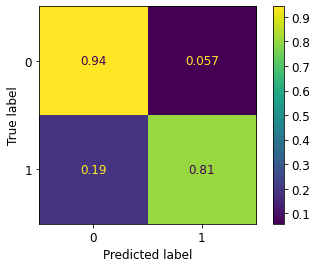

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(tree_model, X_test, y_test,  normalize='true')  
plt.show()

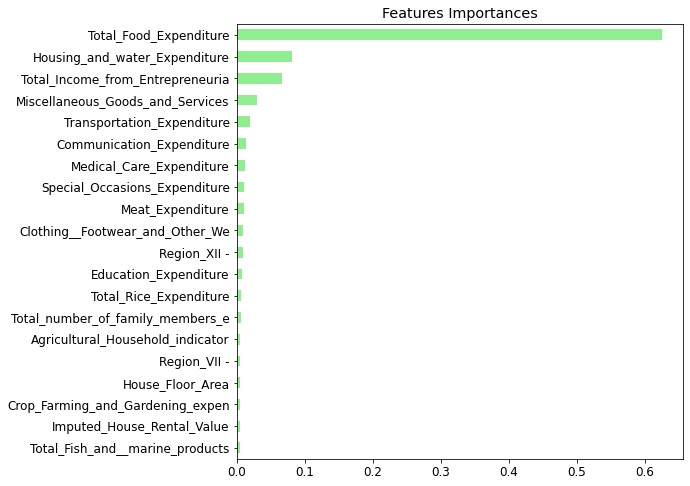

In [ ]:
# Create a pd.Series of features importances
importances = pd.Series(data=tree_model.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values(ascending=True).tail(20)

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(8,8))
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

LightGBM classifier

In [ ]:
import pandas as pd
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 38, is_unbalance = 'true')


param_grid = {
    'n_estimators': [x for x in range(24,40,2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)

Streaming output truncated to the last 5000 lines.
Did not meet early stopping. Best iteration is:
[30]	valid_0's binary_logloss: 0.149935	valid_0's auc: 0.979364	valid_0's l1: 0.0850774
[1]	valid_0's binary_logloss: 0.271877	valid_0's auc: 0.944363	valid_0's l1: 0.189575
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.242792	valid_0's auc: 0.962051	valid_0's l1: 0.180709
[3]	valid_0's binary_logloss: 0.224542	valid_0's auc: 0.964603	valid_0's l1: 0.172694
[4]	valid_0's binary_logloss: 0.210971	valid_0's auc: 0.966638	valid_0's l1: 0.164939
[5]	valid_0's binary_logloss: 0.200484	valid_0's auc: 0.967756	valid_0's l1: 0.157561
[6]	valid_0's binary_logloss: 0.192781	valid_0's auc: 0.970463	valid_0's l1: 0.151325
[7]	valid_0's binary_logloss: 0.187139	valid_0's auc: 0.971012	valid_0's l1: 0.14575
[8]	valid_0's binary_logloss: 0.182268	valid_0's auc: 0.971596	valid_0's l1: 0.140472
[9]	valid_0's binary_logloss: 0.17824	valid_0's auc: 0.972783	val

GridSearchCV(cv=None, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      is_unbalance='true', learning_rate=0.125,
                                      max_depth=-1, metric='l1',
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=20,
                                      n_jobs=-1, num_leaves=38, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param

In [ ]:
print('Best parameters found by grid search are:', gridsearch.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.2, 'n_estimators': 38}


In [ ]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2, metric = 'l1', 
                        n_estimators = 38, is_unbalance= 'true')


gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's binary_logloss: 0.240746	valid_0's auc: 0.95212	valid_0's l1: 0.18327
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.217075	valid_0's auc: 0.96299	valid_0's l1: 0.170513
[3]	valid_0's binary_logloss: 0.203549	valid_0's auc: 0.966397	valid_0's l1: 0.15988
[4]	valid_0's binary_logloss: 0.195737	valid_0's auc: 0.968146	valid_0's l1: 0.151108
[5]	valid_0's binary_logloss: 0.190283	valid_0's auc: 0.969111	valid_0's l1: 0.143161
[6]	valid_0's binary_logloss: 0.185288	valid_0's auc: 0.971658	valid_0's l1: 0.135691
[7]	valid_0's binary_logloss: 0.182039	valid_0's auc: 0.97296	valid_0's l1: 0.129606
[8]	valid_0's binary_logloss: 0.17888	valid_0's auc: 0.974211	valid_0's l1: 0.123892
[9]	valid_0's binary_logloss: 0.176967	valid_0's auc: 0.974961	valid_0's l1: 0.119397
[10]	valid_0's binary_logloss: 0.174938	valid_0's auc: 0.975412	valid_0's l1: 0.114818
[11]	valid_0's binary_logloss: 0.174228	valid_0's auc: 0.975178	valid_0's l1: 0.1114

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', is_unbalance='true', learning_rate=0.2,
               max_depth=-1, metric='l1', min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=38,
               n_jobs=-1, num_leaves=31, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

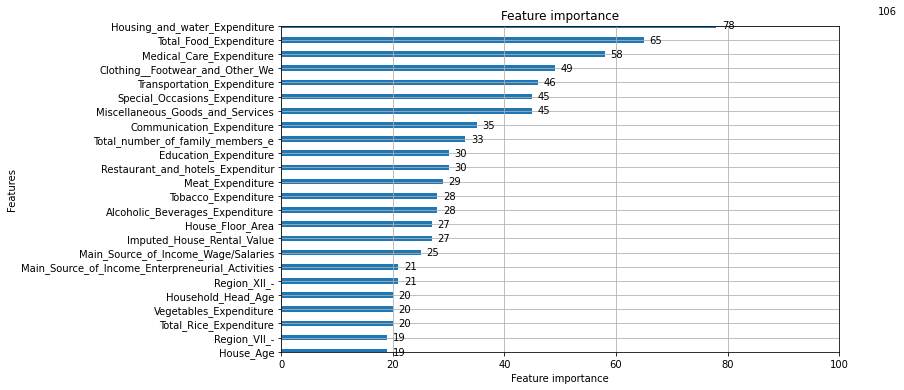

In [ ]:
ax = lgb.plot_importance(gbm, height = 0.4, 
                         max_num_features = 25, 
                         xlim = (0,100), ylim = (0,23), 
                         figsize = (10,6))
plt.show()

In [ ]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred))
print('The roc_auc_score of prediction is:', roc_auc_score(y_test, y_pred))
print('The null acccuracy is:', max(y_test.mean(), 1 - y_test.mean()))

The accuracy of prediction is: 0.9426934097421203
The roc_auc_score of prediction is: 0.9299207584829808
The null acccuracy is: 0.8887106017191977


In [ ]:
y_pred_prob = gbm.predict_proba(X_test)[:, 1]

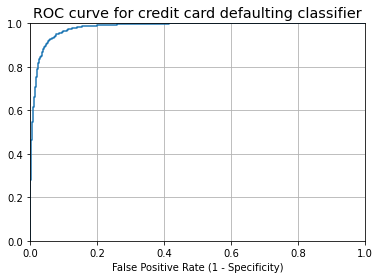

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for credit card defaulting classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.grid(True)

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[7338  416]
 [  84  887]]


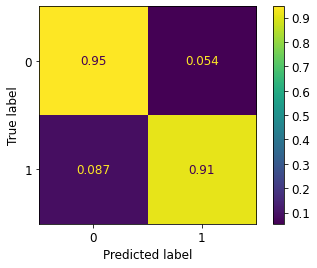

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(gbm, X_test, y_test,  normalize='true')  
plt.show()

In [ ]:
precision_score(y_pred,y_test,average=None).mean()

0.929920758482981

Neural Networks

In [ ]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
import keras


# build a model
model = Sequential()
model.add(Dense(16, input_shape=(X_train.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

# compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

class_weight = {0: 0.1,
                1: 0.9}

# now we just update our model fit call
history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=100, # you can set this to a big number!
                    batch_size=32,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1,
                    class_weight=class_weight)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                2704      
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 2,993
Trainable params: 2,993
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
509/509 [==============================] - 2s 3ms/step - loss: 0.0922 - accuracy: 0.6576 - val_loss: 0.3731 - val_accuracy: 0.8207
Epoch 2/100
509/509 [==============================] - 1s 2ms/step - loss: 0.0484 - accuracy: 0.8457 - val_loss: 0.3128 - val_accuracy: 0.8558
Epoch 3/100
509/509 [==============================] - 1s 2ms/step - loss: 0.0416 - accuracy: 0.

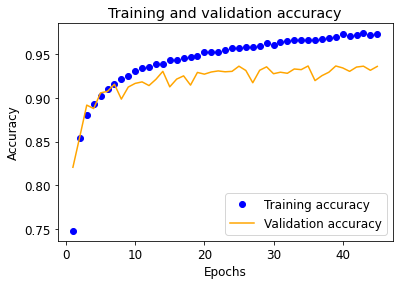

0.9363948702812195

In [ ]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# numbers between 0 and 1? 
model.predict(X_test) 
np.round(model.predict(X_test),0) # 1 and 0 

# round to a whole number (0 or 1)
preds = np.round(model.predict(X_test),0)

# confusion matrix
print(confusion_matrix(y_test, preds)) # order matters! (actual, predicted)

[[7308  446]
 [ 170  801]]


In [ ]:
# define my own plot_confusion_matrix function as the default one requires first paramter to be a scikit-learn classifier model

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('viridis')

    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="orange")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="orange")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

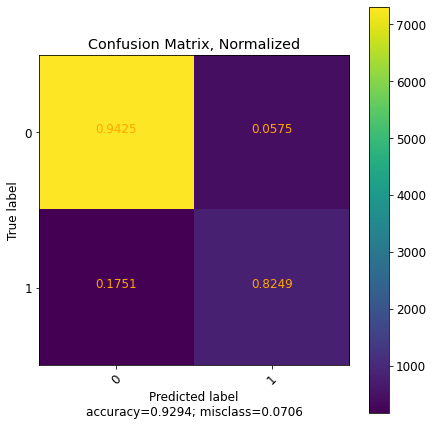

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm           = cm, 
                      normalize    = True,
                      target_names = ['0', '1'],
                      title        = "Confusion Matrix, Normalized")

Comparing Poor and Non-Poor groups



In [ ]:
new_df.groupby('Poverty_Flag').agg({'Housing_and_water_Expenditure': {'median', 'mean'}, 'Total_Food_Expenditure': 'median'})

Housing_and_water_Expenditure               Total_Food_Expenditure
                                    median          mean                 median
Poverty_Flag                                                                   
0                                    26406  41790.414186                78576.5
1                                     9066  10327.314843                32646.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f11bb371e50>,
      dtype=object)

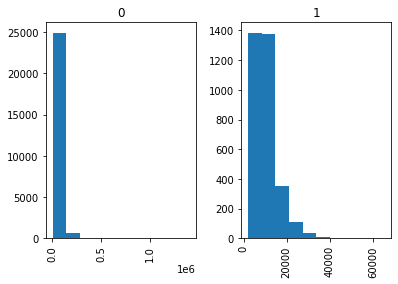

In [ ]:
new_df['Housing_and_water_Expenditure'].hist(by=new_df['Poverty_Flag'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f11bacc10d0>,
      dtype=object)

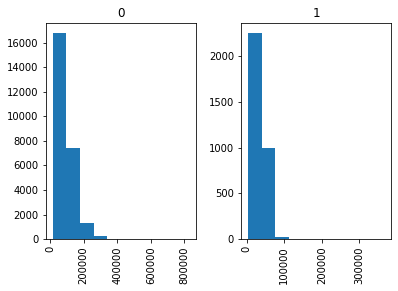

In [ ]:
new_df['Total_Food_Expenditure'].hist(by=new_df['Poverty_Flag'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f11baaeb4d0>,
      dtype=object)

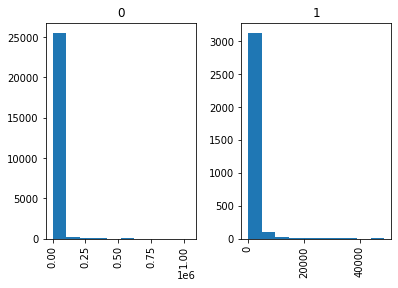

In [ ]:
new_df['Medical_Care_Expenditure'].hist(by=new_df['Poverty_Flag'])